In [648]:
# Import Libraries
from PyVisualFields import visualFields
from PyVisualFields import vfprogression
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#1) Import raw VF data
df_VFs = pd.read_csv('raw_VF_data')
#2) Get required inputs for each criteria from PyVisualField Package 
df_td, df_tdp,df_pd, df_pdp = visualFields.getallvalues(df_VFs) 
#3) Obtain required columns from each dataframe
raw_data_td = df_td.loc[:, 'l1':'l54']
raw_data_tdp = df_tdp.loc[:, 'l1':'l54']
raw_data_pd = df_pd.loc[:, 'l1':'l54']
raw_data_pdp = df_pdp.loc[:, 'l1':'l54']
#4) Call each functions and save resulted diagnosis
df_diag_HAP2_p1 = Fn_HAP2_p1(raw_data_pdp)
df_diag_HAP2_p2 = Fn_HAP2_p2(raw_data_pdp)
df_diag_UKGTS = Fn_UKGTS(raw_data_tdp)
df_diag_LoGTS = Fn_UKGTS(raw_data_td)
df_diag_Kang = Fn_UKGTS(raw_data_td)
df_diag_Foster = Fn_UKGTS(raw_data_pdp)
df_diag_GHT = Fn_UKGTS(raw_data_pdp)

In [200]:
#Preproccessing data to match the datatype and structure
m1=pd.read_csv('C:/Users/musa1/PyVisualField/VF_Data_restructured.csv',encoding='windows-1254')
m1['date'] = m1['date'].astype('datetime64')
m1['id']=m1['id'].astype(np.int32)
m1['age']=m1['age'].astype(np.int32)
m1 = m1.apply(lambda x: x.astype('int32') if x.dtype == 'float64' else x)
m1.dtypes


id               int32
eye             object
date    datetime64[ns]
time            object
age              int32
             ...      
l50              int32
l51              int32
l52              int32
l53              int32
l54              int32
Length: 64, dtype: object

In [201]:
print(m1)

         id eye       date     time  age type  fpr  fnr  fl duration  ...  \
0       647  OD 2008-08-13  0:00:00   53  pwg    0    0   0  0:00:00  ...   
1       647  OD 2008-08-13  0:00:00   54  pwg    0    0   0  0:00:00  ...   
2       647  OD 2008-08-13  0:00:00   55  pwg    0    0   0  0:00:00  ...   
3       647  OD 2008-08-13  0:00:00   58  pwg    0    0   0  0:00:00  ...   
4       647  OD 2008-08-13  0:00:00   59  pwg    0    0   0  0:00:00  ...   
...     ...  ..        ...      ...  ...  ...  ...  ...  ..      ...  ...   
28938  7324  OS 2008-08-13  0:00:00   66  pwg    0    0   0  0:00:00  ...   
28939  6859  OD 2008-08-13  0:00:00   79  pwg    0    0   0  0:00:00  ...   
28940  6859  OD 2008-08-13  0:00:00   81  pwg    0    0   0  0:00:00  ...   
28941  1142  OS 2008-08-13  0:00:00   67  pwg    0    0   0  0:00:00  ...   
28942  1142  OS 2008-08-13  0:00:00   68  pwg    0    0   0  0:00:00  ...   

       l45  l46  l47  l48  l49  l50  l51  l52  l53  l54  
0       26   29  

# Obtaining TDP and PDP using PyVisualField Package. Please install approperiate packages/libraries as mentioned at: (https://github.com/mohaEs/PyVisualField/blob/main/readme_Installation.md)

Shape of Total Deviation:(54,)
Type of Total Deviation: <class 'tuple'>


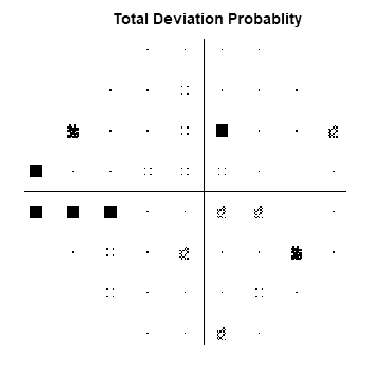

In [564]:
df_td, df_tdp, df_gi, df_gip, df_pd, df_pdp, gh = visualFields.getallvalues(m1)#df_VFs_py data is acquired using 

ind_td_start=df_td.columns.get_loc("l1")
ind_td_end=df_td.columns.get_loc("l54") 

df_td = df_td.fillna(0)
df_tdp = df_tdp.fillna(0)

td = df_td.iloc[0,ind_td_start:ind_td_end+1].to_numpy().astype(np.int8())
print('Shape of Total Deviation:{}'.format(td.shape))
print('Type of Total Deviation:', type(td.shape))
tdp = df_tdp.iloc[0, ind_td_start:ind_td_end+1].to_numpy().astype(np.float16())
vfprogression.plotProbabilities(tdp, title= 'Total Deviation Probablity',
                                 save=True, filename='tdp', fmt='png') 

# 0- Data pre-processing: Filling out NaN values in a row with the median of that row

In [644]:
# Load original MTD from dataset
org_data = pd.read_csv('C:/Users/musa1/PyVisualField/VF_Data_org.csv', encoding='windows-1254')

columns_to_check_pdp = df_pdp.loc[:, 'l1':'l54']
columns_to_check_td = df_td.loc[:, 'l1':'l54']
columns_to_check_tdp = df_tdp.loc[:, 'l1':'l54']
# Function to fill NaN values in a row with the median of that row
def fill_nan_with_median(row):
    median_value = row.median()
    return row.fillna(median_value)

# Apply the function to each row
columns_to_check_pdp = columns_to_check_pdp.apply(fill_nan_with_median, axis=1)
columns_to_check_td = columns_to_check_td.apply(fill_nan_with_median, axis=1)
columns_to_check_tdp = columns_to_check_tdp.apply(fill_nan_with_median, axis=1)

df_HAP2_p2 = columns_to_check_pdp
df_LoGTS = columns_to_check_td
df_UKGTS = columns_to_check_tdp

# Merge the DataFrames based on the common column 'ID'
df_HAP2_p2 = df_HAP2_p2.set_index(org_data.index)
df_HAP2_p2['MTD'] = org_data['MTD'].values
# Filter the DataFrame for 'OD' eyes
df_HAP2_p2['eye'] = m1['eye'] 



In [645]:
df_HAP2_p2

,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,...,l47,l48,l49,l50,l51,l52,l53,l54,MTD,eye
0,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.950,0.950,0.95,0.95,0.95,0.95,0.95,0.95,-4.623269,OD
1,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.950,0.950,0.95,0.95,0.95,0.95,0.95,0.95,-2.265192,OD
2,0.95,0.05,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.950,0.950,0.95,0.95,0.95,0.95,0.95,0.95,-2.879615,OD
3,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.01,...,0.950,0.950,0.95,0.95,0.95,0.05,0.95,0.95,-4.220192,OD
4,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.950,0.950,0.05,0.95,0.95,0.95,0.95,0.95,-4.464231,OD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28938,0.95,0.95,0.95,0.95,0.050,0.005,0.95,0.95,0.95,0.95,...,0.950,0.950,0.95,0.95,0.95,0.95,0.95,0.95,-4.234231,OS
28939,0.95,0.95,0.98,0.95,0.005,0.950,0.95,0.95,0.95,0.95,...,0.950,0.950,0.95,0.95,0.95,0.95,0.95,0.95,-6.987692,OD
28940,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.05,0.01,0.95,...,0.950,0.950,0.95,0.95,0.95,0.95,0.95,0.95,-7.356154,OD
28941,0.95,0.95,0.95,0.95,0.950,0.950,0.98,0.95,0.95,0.95,...,0.005,0.005,0.95,0.95,0.95,0.95,0.95,0.95,-3.712500,OS


# 1- HAP2-partII Criteria

In [646]:
def Fn_HAP2_part2(df_HAP2_p2):
  
    # Count the number of values less than 0.05 and 0.01 for each row
    count_05 = (df_HAP2_part2 <= 0.05).sum(axis=1)
    count_01 = (df_HAP2_part2 <= 0.01).sum(axis=1)
    
    # Add the count as new columns to the DataFrame
    df_HAP2_p2['Count_Less_Than_0.05'] = count_05
    df_HAP2_p2['Count_Less_Than_0.01'] = count_01

    # Define a function to apply the conditions and create the new column
    def stage_classification(row):
        if 0.01 <= abs(row['MTD']) <= 6 and 1 <= row['Count_Less_Than_0.05'] <= 12 and 1 <= row['Count_Less_Than_0.01'] <= 4:
            return "Stage 1"
        elif 6.01 <= abs(row['MTD']) <= 12 and 13 <= row['Count_Less_Than_0.05'] <= 26 and 5 <= row['Count_Less_Than_0.01'] <= 13:
            return "Stage 2"
        elif 12.01 <= abs(row['MTD']) and row['Count_Less_Than_0.05'] >= 27 and row['Count_Less_Than_0.01'] >= 14:
            return "Stage 3"
        else:
            return "Non-GL"
    
    df_HAP2_p2['HAP2_p2_clf'] = df_HAP2_p2.apply(stage_classification, axis=1)
    
    return df_HAP2_p2

In [647]:
HAP2_p2_result = Fn_HAP2_part2(df_HAP2_p2.copy())
HAP2_p2_result

,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,...,l50,l51,l52,l53,l54,MTD,eye,Count_Less_Than_0.05,Count_Less_Than_0.01,HAP2_p2_clf
0,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-4.623269,OD,1,1,Stage 1
1,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-2.265192,OD,3,1,Stage 1
2,0.95,0.05,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-2.879615,OD,6,2,Stage 1
3,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.01,...,0.95,0.95,0.05,0.95,0.95,-4.220192,OD,9,3,Stage 1
4,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-4.464231,OD,7,3,Stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28938,0.95,0.95,0.95,0.95,0.050,0.005,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-4.234231,OS,7,4,Stage 1
28939,0.95,0.95,0.98,0.95,0.005,0.950,0.95,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-6.987692,OD,18,16,Non-GL
28940,0.95,0.95,0.95,0.95,0.950,0.950,0.95,0.05,0.01,0.95,...,0.95,0.95,0.95,0.95,0.95,-7.356154,OD,14,12,Stage 2
28941,0.95,0.95,0.95,0.95,0.950,0.950,0.98,0.95,0.95,0.95,...,0.95,0.95,0.95,0.95,0.95,-3.712500,OS,10,7,Non-GL


Classification Results for total eyes:
Non-GL    11928
GL        17015
Name: HAP2_p2_clf, dtype: int64


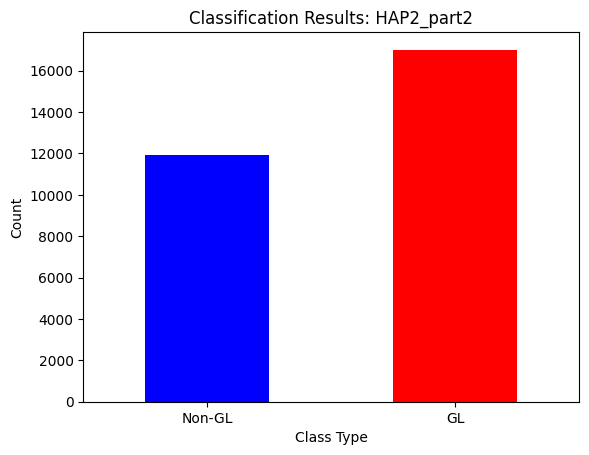

In [655]:
# Assuming 'GL' is included in 'Stage 1', 'Stage 2', and 'Stage 3'
# Filter the DataFrame to include only 'Non-GL' and 'GL'
gl_classification_results = HAP2_p2_result[HAP2_p2_result['HAP2_p2_clf'].isin(['Non-GL', 'Stage 1', 'Stage 2', 'Stage 3'])]

# Combine 'Stage 1', 'Stage 2', and 'Stage 3' into one category 'GL'
gl_classification_results.loc[gl_classification_results['HAP2_p2_clf'].isin(['Stage 1', 'Stage 2', 'Stage 3']), 'HAP2_p2_clf'] = 'GL'

# Count the occurrences of each stage
classification_counts = gl_classification_results['HAP2_p2_clf'].value_counts()

# Reorder the DataFrame based on the custom order
counts_hap2_p2 = classification_counts.reindex(['Non-GL', 'GL'])

# Display the classification results
print("Classification Results for total eyes:")
print(counts_hap2_p2)

# Plot the ordered DataFrame
counts_hap2_p2.plot(kind='bar', rot=0, color=['blue', 'red'])
plt.title('Classification Results: HAP2_part2')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

Classification Results for total eyes:
Non-GL     11928
Stage 1    11561
Stage 2     1720
Stage 3     3734
Name: HAP2_p2_clf, dtype: int64


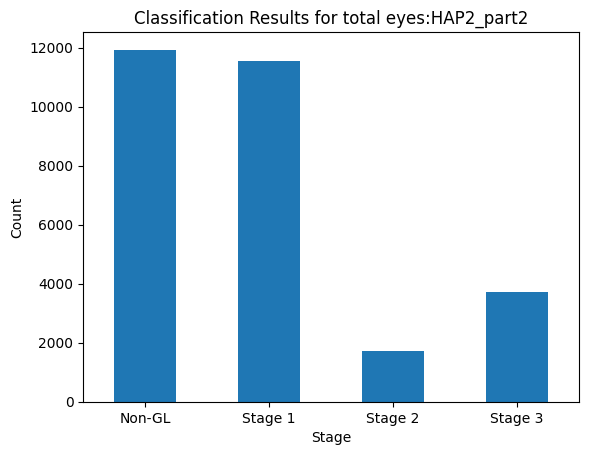

In [613]:
# 4 class classification
# Display the count of each unique value in the 'Stage' column
classification_results = HAP2_p2_result['HAP2_p2_clf'].value_counts()
stage_order = ['Non-GL', 'Stage 1', 'Stage 2', 'Stage 3']

# Reorder the DataFrame based on the custom order
classification_results_ordered = classification_results.reindex(stage_order)

# Display the classification results
print("Classification Results for total eyes:")
print(classification_results_ordered)

import matplotlib.pyplot as plt
# Visualizing


# Plot the ordered DataFrame
classification_results_ordered.plot(kind='bar', rot=0)
plt.title('Classification Results for total eyes:HAP2_part2')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

In [626]:
df_od

,id,eye,date,time,age,type,fpr,fnr,fl,duration,...,l45,l46,l47,l48,l49,l50,l51,l52,l53,l54
0,647,OD,2008-08-13,0:00:00,53,pwg,0,0,0,0:00:00,...,26,29,29,28,29,28,28,27,26,28
1,647,OD,2008-08-13,0:00:00,54,pwg,0,0,0,0:00:00,...,31,31,31,31,30,30,26,29,31,31
2,647,OD,2008-08-13,0:00:00,55,pwg,0,0,0,0:00:00,...,31,33,30,32,31,29,30,26,29,27
3,647,OD,2008-08-13,0:00:00,58,pwg,0,0,0,0:00:00,...,27,29,31,28,29,27,26,23,27,27
4,647,OD,2008-08-13,0:00:00,59,pwg,0,0,0,0:00:00,...,28,29,27,27,26,26,26,28,28,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28930,3215,OD,2008-08-13,0:00:00,48,pwg,0,0,0,0:00:00,...,31,31,31,32,32,31,29,30,32,36
28933,503,OD,2008-08-13,0:00:00,87,pwg,0,0,0,0:00:00,...,0,0,9,9,20,10,0,0,0,0
28934,503,OD,2008-08-13,0:00:00,87,pwg,0,0,0,0:00:00,...,22,27,26,29,28,28,27,26,26,31
28939,6859,OD,2008-08-13,0:00:00,79,pwg,0,0,0,0:00:00,...,29,30,28,31,30,31,25,28,30,28


Classification Results for OD Eyes:
Non-GL     5943
Stage 1    5898
Stage 2     800
Stage 3    1792
Name: HAP2_p2_clf, dtype: int64

Classification Results for OS Eyes:
Non-GL     5985
Stage 1    5663
Stage 2     920
Stage 3    1942
Name: HAP2_p2_clf, dtype: int64


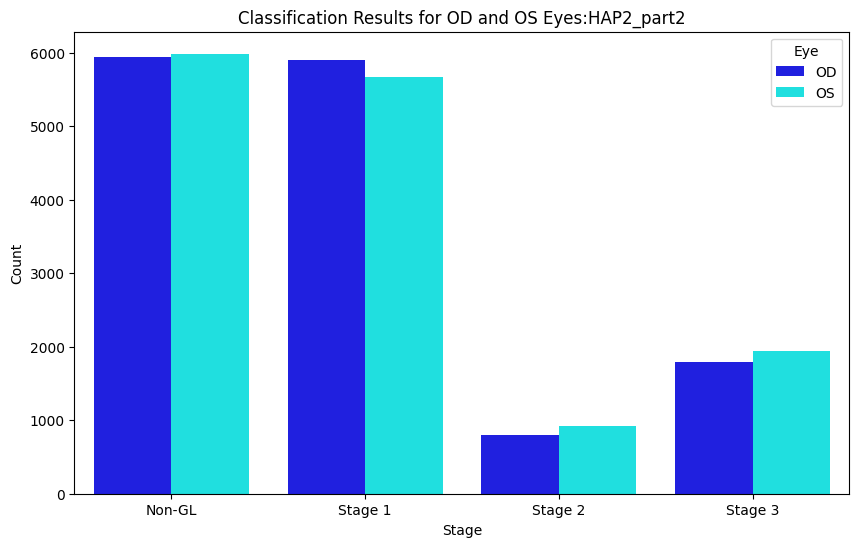

In [650]:
# Filter the DataFrame for 'OD' eyes
df_od = HAP2_p2_result[HAP2_p2_result['eye'] == 'OD']

# Filter the DataFrame for 'OS' eyes
df_os = HAP2_p2_result[HAP2_p2_result['eye'] == 'OS']
stage_order = ['Non-GL', 'Stage 1', 'Stage 2', 'Stage 3']

# Display the count of each unique value in the 'Stage' column for 'OD' eyes
classification_results_od = df_od['HAP2_p2_clf'].value_counts()
classification_results_ordered_od = classification_results_od.reindex(stage_order)

# Display the count of each unique value in the 'Stage' column for 'OS' eyes
classification_results_os = df_os['HAP2_p2_clf'].value_counts()
classification_results_ordered_os = classification_results_os.reindex(stage_order)

# Display the classification results for 'OD' eyes
print("Classification Results for OD Eyes:")
print(classification_results_ordered_od)

# Display the classification results for 'OS' eyes
print("\nClassification Results for OS Eyes:")
print(classification_results_ordered_os)

# Visualizing
# Concatenate 'OD' and 'OS' eyes into one DataFrame
df_both = pd.concat([df_od, df_os])

# Plot a bar plot with 'eye' as hue
plt.figure(figsize=(10, 6))
sns.countplot(x='HAP2_p2_clf', data=df_both, hue='eye', palette={'OD': 'blue', 'OS': 'cyan'}, order=stage_order)
plt.title('Classification Results for OD and OS Eyes:HAP2_part2')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.legend(title='Eye', loc='upper right')

# Show the plot
plt.show()

In [18]:
# save tdp and pdp into the excel file
# We need to merge these new data into the original VFs

directory_path = '/Users/musa1/OneDrive - University of Massachusetts/Desktop/VF_Harvard/'
name1 = 'TDP_data'
name2 = 'PDP_data'
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_file_name1 = f'{name1}_{timestamp}.csv'
csv_file_name2 = f'{name2}_{timestamp}.csv'

csv_file_path1 = f'{directory_path}{csv_file_name1}'
csv_file_path2 = f'{directory_path}{csv_file_name2}'


df_tdp.to_csv(csv_file_path1, index=False)
df_pdp.to_csv(csv_file_path2, index=False)

In [ ]:
############# Test 3###########################

# 2- UKGTS

In [658]:
# Function to check the condition for GL
def check_gl_condition(row, threshold=0.01, consecutive_reductions=2):
    p_values = row.values
    reduction_count = 0
    consecutive_count = 0

    for p_value in p_values:
        if p_value < threshold:
            consecutive_count += 1
            if consecutive_count >= consecutive_reductions:
                reduction_count += 1
        else:
            consecutive_count = 0

    return reduction_count >= 2

# Apply the condition to identify GL or Non-GL
df_UKGTS['GL'] = df_UKGTS.apply(check_gl_condition, axis=1)

# Assign 'Non-GL' or 'GL' based on the condition
df_UKGTS['UKGTS_clf'] = np.where(df_UKGTS['GL'], 'GL', 'Non-GL')

# Display the result
print(df_UKGTS)

         l1    l2    l3    l4    l5     l6    l7    l8     l9    l10  ...  \
1      0.95  0.95  0.95  0.95  0.95  0.950  0.05  0.95  0.950  0.950  ...   
2      0.95  0.95  0.95  0.95  0.95  0.950  0.95  0.95  0.950  0.950  ...   
3      0.95  0.05  0.95  0.95  0.95  0.950  0.95  0.95  0.950  0.950  ...   
4      0.95  0.05  0.95  0.95  0.95  0.950  0.95  0.95  0.050  0.005  ...   
5      0.95  0.95  0.95  0.95  0.95  0.950  0.95  0.95  0.050  0.950  ...   
...     ...   ...   ...   ...   ...    ...   ...   ...    ...    ...  ...   
28939  0.95  0.95  0.95  0.95  0.02  0.005  0.95  0.95  0.950  0.950  ...   
28940  0.95  0.95  0.95  0.95  0.05  0.950  0.95  0.95  0.950  0.950  ...   
28941  0.95  0.95  0.95  0.95  0.95  0.950  0.95  0.05  0.005  0.950  ...   
28942  0.95  0.95  0.95  0.95  0.95  0.950  0.95  0.95  0.050  0.950  ...   
28943  0.95  0.95  0.95  0.95  0.95  0.950  0.95  0.95  0.950  0.950  ...   

         l47    l48    l49   l50   l51   l52   l53   l54     GL  UKGTS_clf 

Non-GL    11279
GL        17664
Name: UKGTS_clf, dtype: int64


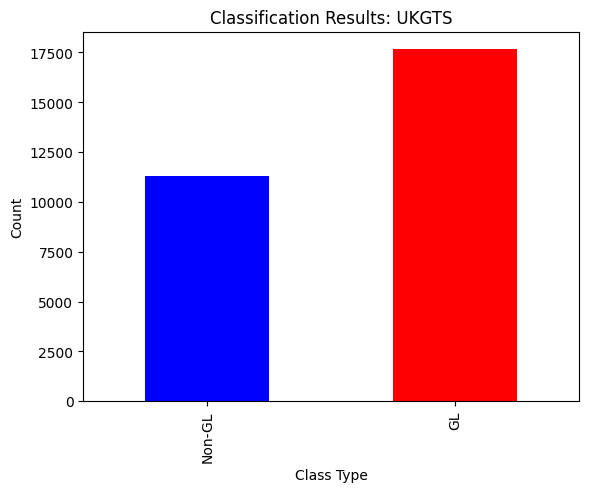

In [659]:
# Count the occurrences of 'GL' and 'Non-GL'
stage_order = ['Non-GL', 'GL']

counts_ukgts = df_UKGTS['UKGTS_clf'].value_counts().reindex(stage_order)
print(clf_ukgts)

# Plot the bar plot
counts_ukgts.plot(kind='bar', color=['blue', 'red'])
plt.title('Classification Results: UKGTS')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

# 3- LoGTS

In [653]:
# Function to classify rows based on the count of values less than -10
def LoGTS_clf(row):
    count_less_than_10 = (row < -10).sum()
    
    if count_less_than_10 <= 2:
        return "GL"
    else:
        return "Non-GL"

# Add 'Count_Less_Than_10' column to df_LoGTS
#df_LoGTS['count_less_than_10'] = df_LoGTS.apply(lambda row: (row < -10).sum(), axis=1)

# Add 'Stage' column based on the LoGTS_clf function
df_LoGTS['LoGTS_clf'] = df_LoGTS.apply(LoGTS_clf, axis=1)

# Display the resulting DataFrame
print(df_LoGTS)

             l1        l2        l3        l4        l5        l6        l7  \
1     -0.581507 -4.110465 -5.160673 -2.732129 -2.151032 -2.158742 -4.687700   
2      0.481651 -1.050339  0.900174 -0.666807 -0.087595  0.897910 -2.634080   
3     -4.455191 -5.990213 -4.038978 -3.601486  1.975842  0.954562 -1.580461   
4     -3.265716 -6.809835 -5.856437 -6.405522  1.166153 -1.875482 -2.419601   
5     -2.202558 -4.749709 -0.795590 -4.340201 -2.770410 -1.818830 -3.365981   
...         ...       ...       ...       ...       ...       ...       ...   
28939 -4.760452 -1.328826 -0.369660 -0.882953 -5.326352 -6.422267 -3.990641   
28940  2.060603  2.452813  2.421353 -5.033777 -4.501672  0.314208  1.706417   
28941 -0.813081 -0.426935 -4.456953 -5.903134 -1.374799 -1.572489 -2.186343   
28942  1.302706  1.731300 -0.308813 -0.817631  0.737085  0.634385  1.062978   
28943 -2.634136 -0.208574  1.752034  1.247690 -1.199478 -1.308963  1.116598   

             l8        l9       l10  ...       l46 

Non-GL    11853
GL        17090
Name: LoGTS_clf, dtype: int64


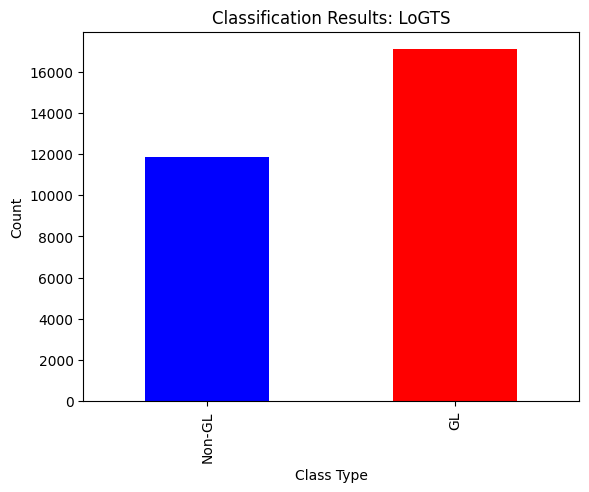

In [656]:
# Visualization
# Count the occurrences of "GL" and "Non-GL"
stage_order = ['Non-GL', 'GL']

counts_logts = df_LoGTS['LoGTS_clf'].value_counts().reindex(stage_order)
print(counts_logts)
counts_logts.plot(kind='bar', color=['blue', 'red'])
plt.title('Classification Results: LoGTS')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

# Comparing results........ Checking agreement or disagreement.... Intraclass Correlation Coefficient (ICC) was used 

In [672]:
tot_counts = pd.DataFrame({
    'HAP2_p2_clf': counts_hap2_p2,
    'UKGTS_clf': counts_ukgts,
    'LoGTS_clf': counts_logts
})
tot_counts

,HAP2_p2_clf,UKGTS_clf,LoGTS_clf
Non-GL,11928,11279,11853
GL,17015,17664,17090


Classification results
        HAP2_p2_clf  UKGTS_clf  LoGTS_clf
Non-GL        11928      11279      11853
GL            17015      17664      17090


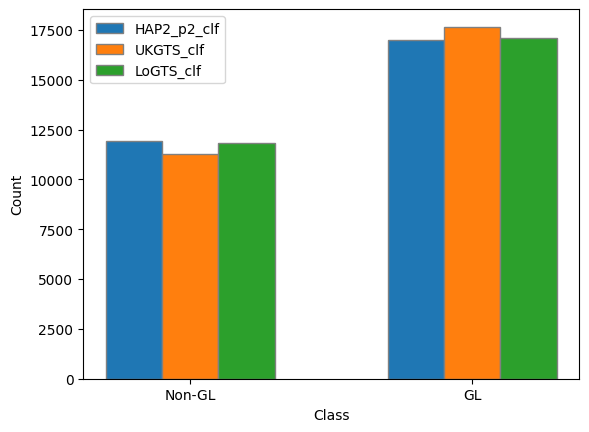

In [684]:
# Data
categories = ['Non-GL', 'GL']
print('Classification results')
print(tot_counts)
# Bar width
bar_width = 0.2

# Set up positions for bars on x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar plots
plt.bar(r1, HAP2_p2_clf, width=bar_width, edgecolor='grey', label='HAP2_p2_clf')
plt.bar(r2, UKGTS_clf, width=bar_width, edgecolor='grey', label='UKGTS_clf')
plt.bar(r3, LoGTS_clf, width=bar_width, edgecolor='grey', label='LoGTS_clf')

# Labeling
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [696]:
from scipy.stats import f_oneway

# Data
hap2_p2_clf = [11928, 11279, 11853]
ukgts_clf = [17015, 17664, 17090]
logts_clf = [17015, 17664, 17090]  # Assuming this is the correct data for LoGTS_clf; adjust as needed

# Combine the data into a list of arrays
data = [hap2_p2_clf, ukgts_clf, logts_clf]

# Perform one-way ANOVA to obtain the total variance
total_variance = np.var(np.concatenate(data))

# Calculate the residual variance (within-group variance)
residual_variance = np.mean([np.var(arr) for arr in data])

# Calculate the ICC
icc = (total_variance - residual_variance) / total_variance

# Print the result
print(f"Intraclass Correlation Coefficient (ICC): {icc}")

Intraclass Correlation Coefficient (ICC): 0.9879567205309778
